Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


In [1]:
# lets import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset and convert into dataframe

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
data.shape

(1338, 7)

Here we can see that its a regression problem and we have dependent and independent variable and the label over here is charges

In [20]:
#checking the statistics of dataset
#the lesser the std the better the model is 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


lets visualize the data to check the relationship between dependent and independent variable also here the count is same which means it does not have null values

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

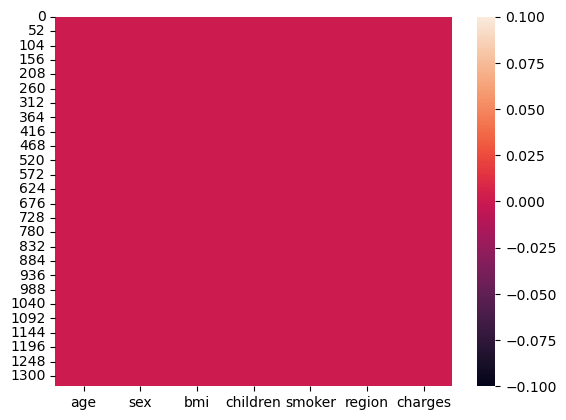

In [9]:
sns.heatmap(data.isnull())

From heat map we can see that there are no null values

In [10]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
data.nunique().to_frame('No.of unique values')

,No.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [12]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [3]:
data.duplicated().sum()

1

One of the data have duplicate values

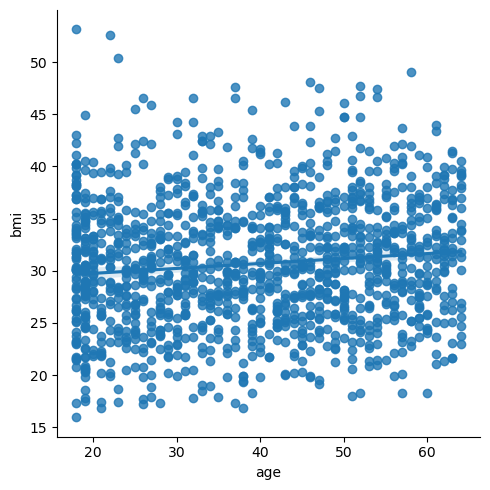

In [6]:
sns.lmplot(x='age',y='bmi',data=data,palette='colorblind')

with this plot we can see that it have positive correlation but not strongly positive

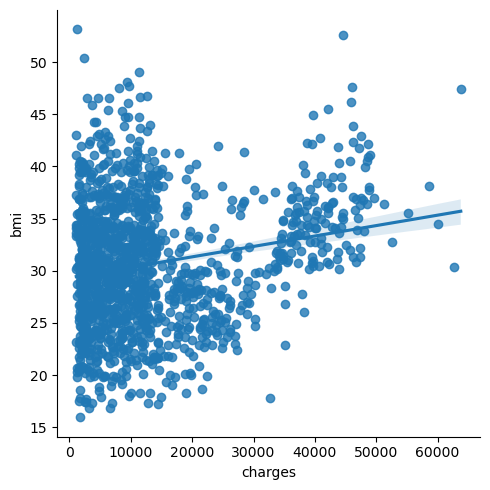

In [32]:
sns.lmplot(x='charges',y='bmi',data=data,palette='colorblind')

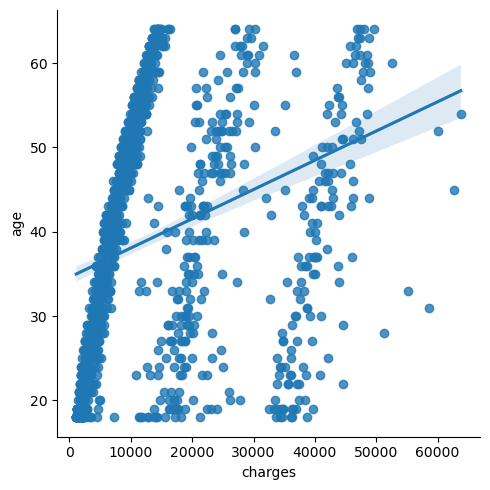

In [31]:
sns.lmplot(x='charges',y='age',data=data,palette='colorblind')

In [26]:
data.drop(['sex'],axis=1, inplace=True)

In [28]:
data.drop(['smoker'],axis=1, inplace=True)
data.drop(['region'],axis=1, inplace=True)

We need to drop the columns which are not necessary to clean the data 

In [29]:
data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see that its almost a balanced model

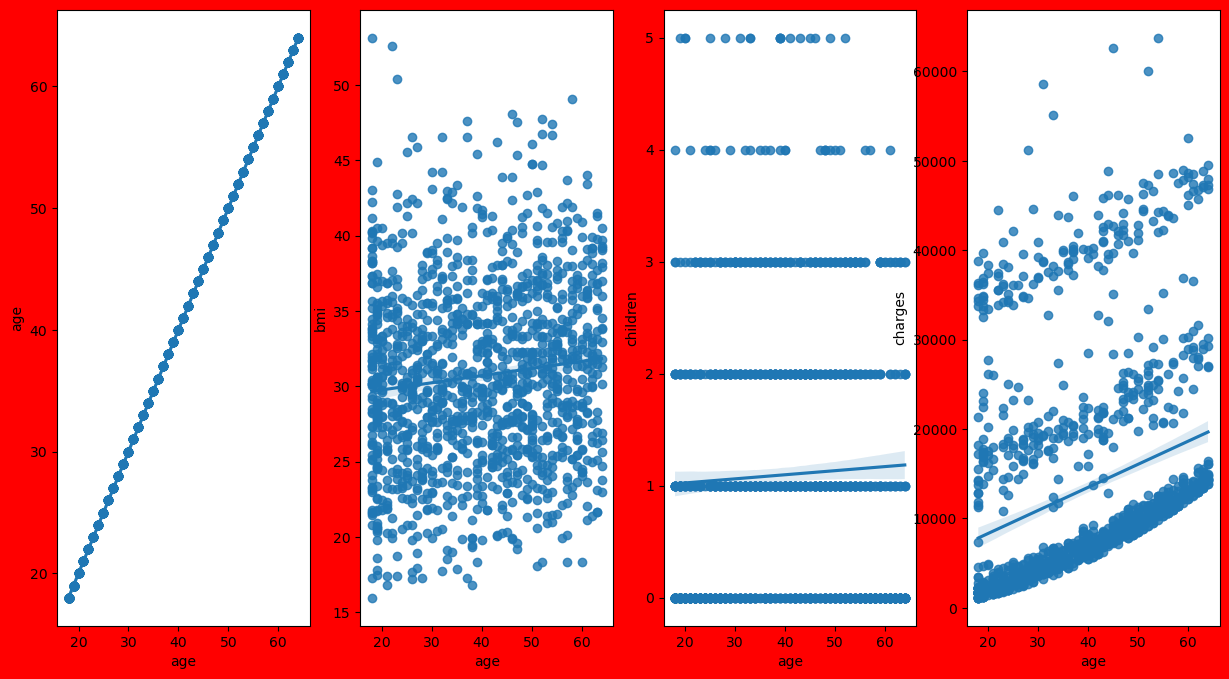

In [39]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=4:
        ax = plt.subplot(1,4,plotnumber)
        sns.regplot(x='age',y=column,data=data)
        plt.xlabel('age')
        plt.ylabel(column)
        
    plotnumber+=1
plt.show()

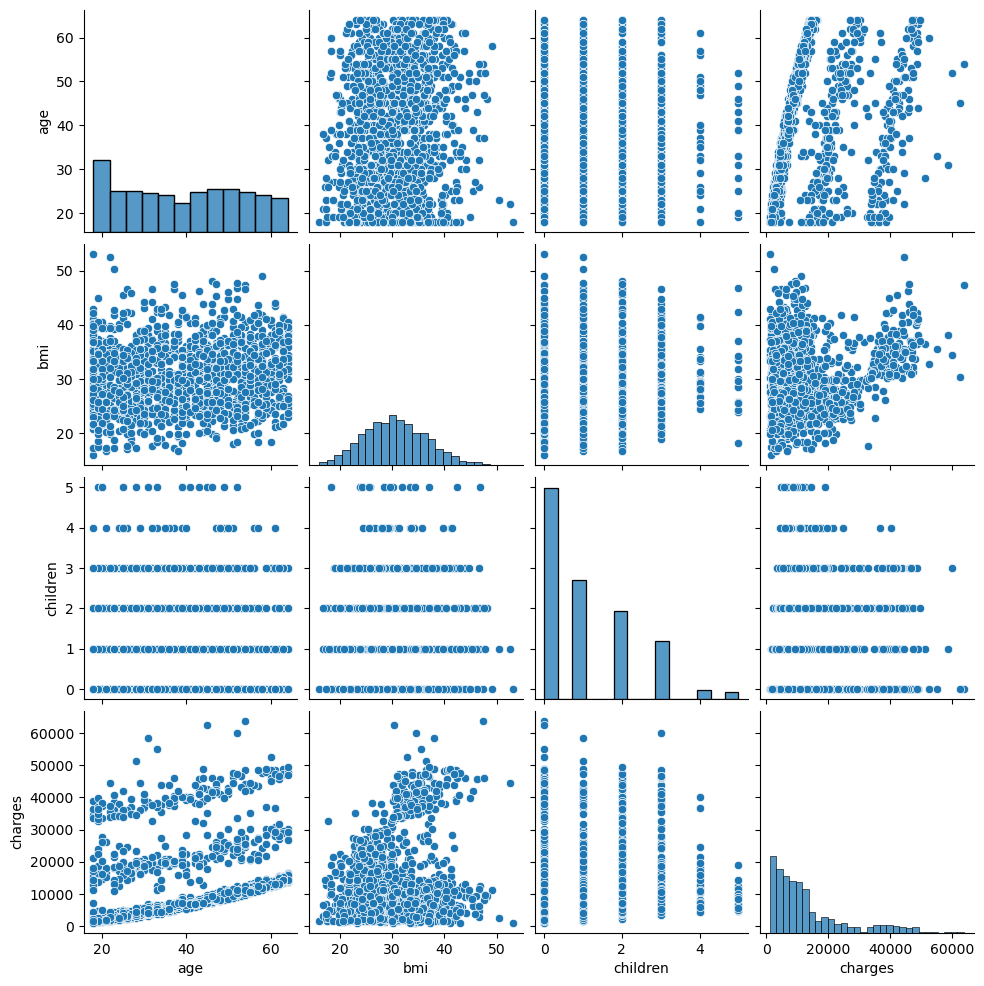

In [42]:
sns.pairplot(data=data)

In [ ]:
All these graphs show a positive correlation

Text(0.5, 1.0, 'The trend of all values')

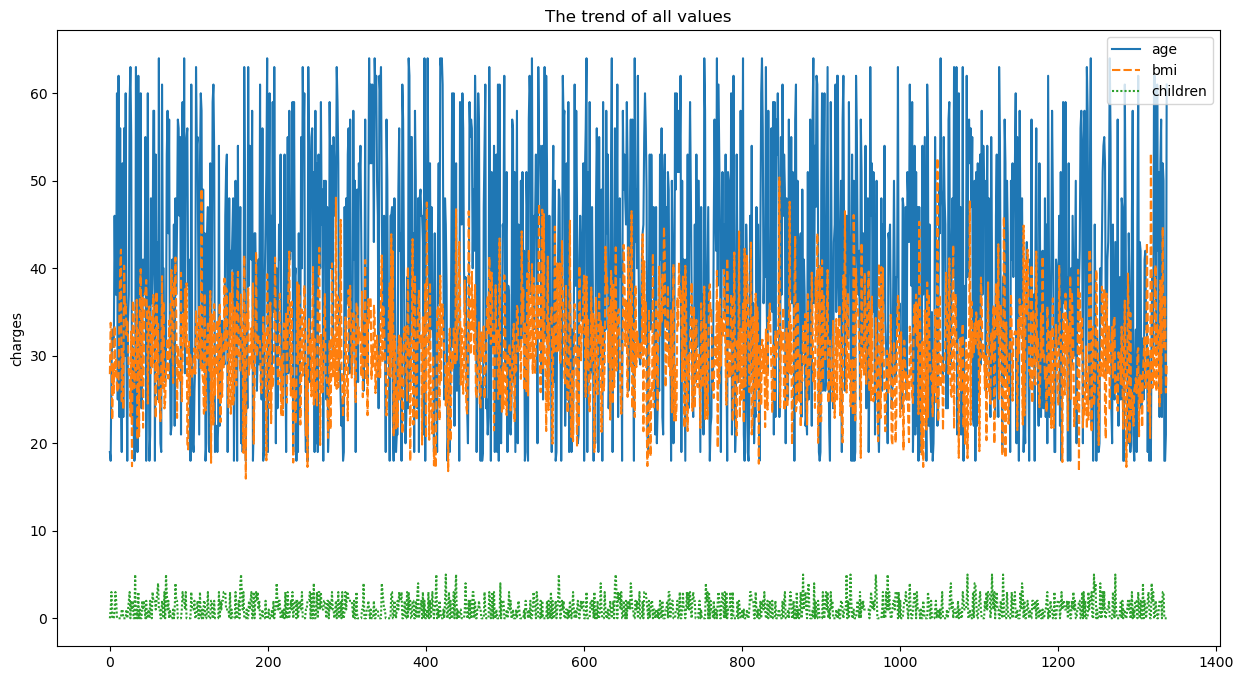

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data.iloc[:,:-1])
plt.ylabel('charges')
plt.title("The trend of all values")


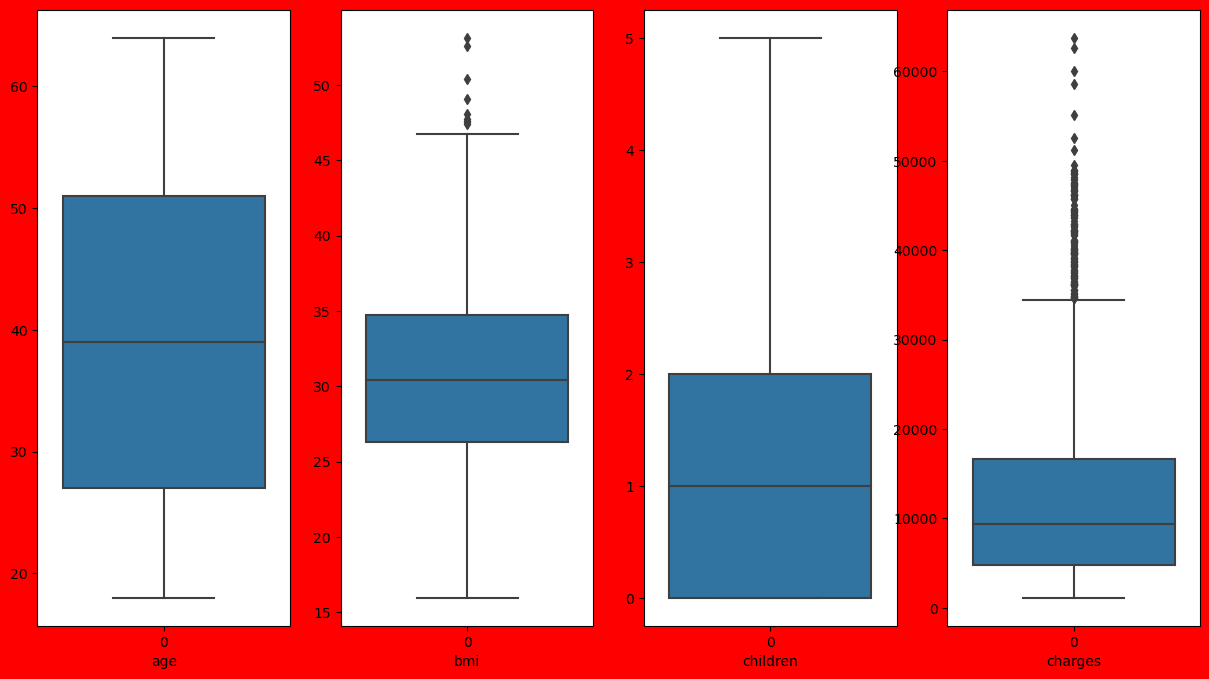

In [44]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax = plt.subplot(1,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

From the above boxplot we can see that there are outliers on bmi and we will ignore the charges column as this is our label

In [45]:
from scipy.stats import zscore
out_features=data['bmi']
z=np.abs(zscore(out_features))
z

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [46]:
np.where(z>3)

(array([ 116,  847, 1047, 1317], dtype=int64),)

Above are the no of outliers suspected 

In [50]:
z.iloc[1047]

3.595297768208803

In [54]:
df = data[(z<3)]
df.shape

(1334, 4)

In [55]:
print('old dataframe- ',data.shape[0])
print('new dataframe- ',df.shape[0])

old dataframe-  1338
new dataframe-  1334


In [56]:
print('data loss %- ',((data.shape[0]-df.shape[0])/data.shape[0])*100)

data loss %-  0.29895366218236175


We can clearly see the data loss percentage which means the outliers are removed

In [57]:
data=df

In [58]:
Q1=out_features.quantile(0.25)

Q3=out_features.quantile(0.75)

IQR=Q3-Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR)))]

We have successfully calculated the inter quartile range

In [59]:
df1.shape

(1334, 4)

In [60]:
print('data loss %- ',((data.shape[0]-df1.shape[0])/data.shape[0])*100)

data loss %-  0.0


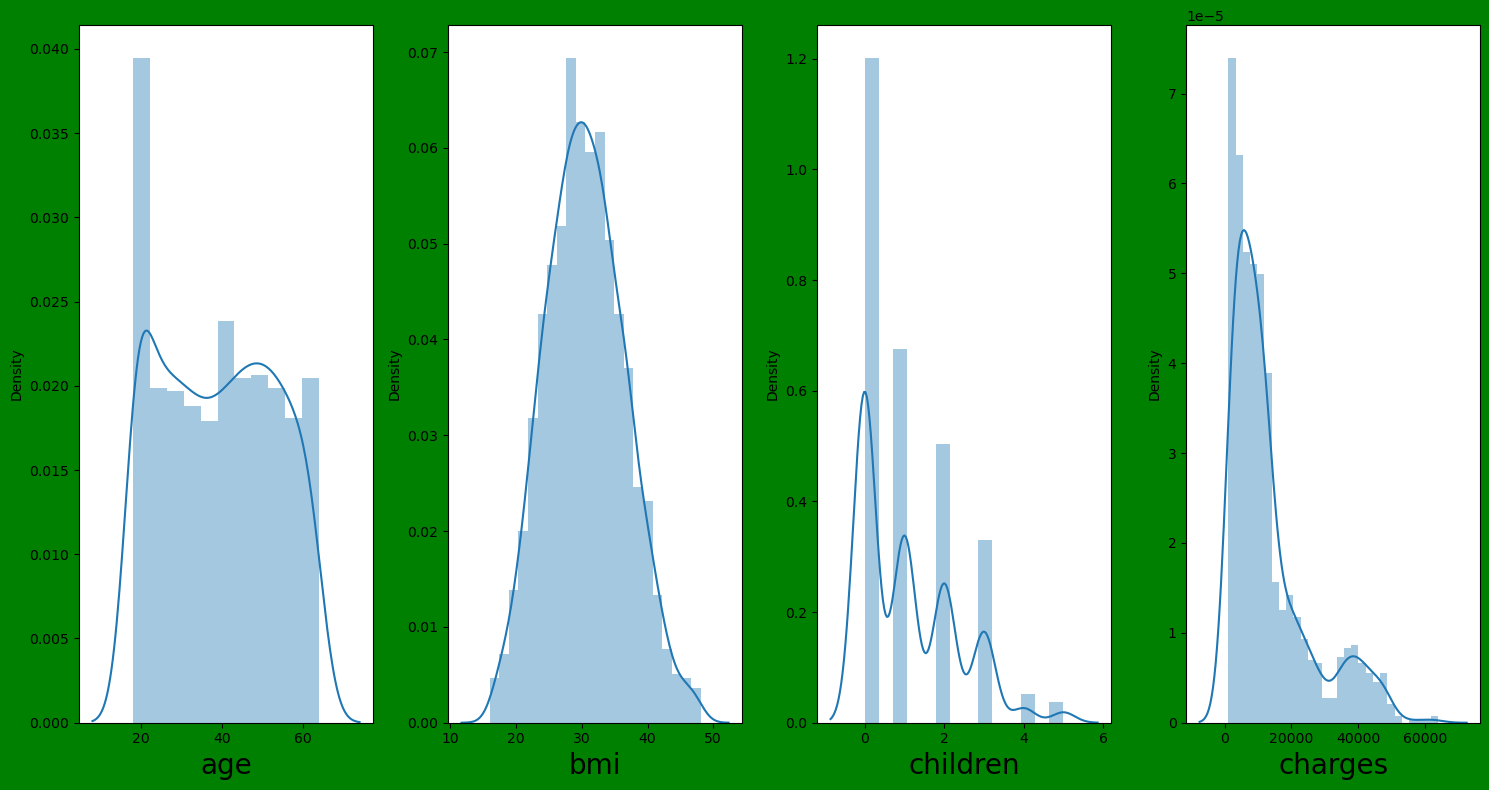

In [65]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=4:
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

From the above graph we can see that the data is not skewed

In [66]:
df.skew()

age         0.053603
bmi         0.205622
children    0.935415
charges     1.517663
dtype: float64

In [67]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.118887,0.042345,0.301360
bmi,0.118887,1.000000,0.018054,0.200799
children,0.042345,0.018054,1.000000,0.067569
charges,0.301360,0.200799,0.067569,1.000000


In [68]:
data.corr().charges.sort_values()

children    0.067569
bmi         0.200799
age         0.301360
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Correlation b/w label and feature')

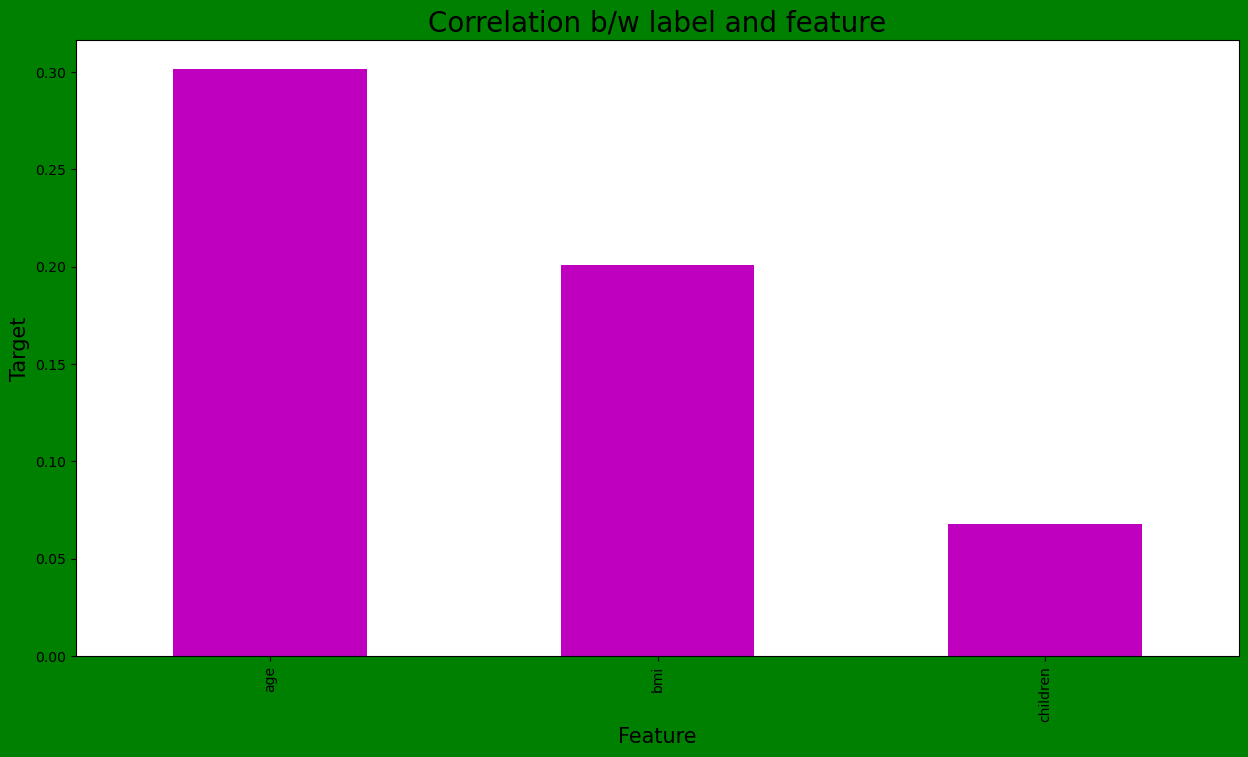

In [69]:
plt.figure(figsize=(15,8), facecolor='green')
data.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation b/w label and feature", fontsize = 20)

In [70]:
x = df.drop('charges', axis=1)
y = df['charges']
print('Feature shape=', x.shape)
print('Label shape=', y.shape)

Feature shape= (1334, 3)
Label shape= (1334,)


In [71]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,bmi,children
0,-1.442249,-0.450359,-0.909299
1,-1.513528,0.528191,-0.080177
2,-0.800739,0.399829,1.578066
3,-0.444344,-1.316383,-0.909299
4,-0.515623,-0.286989,-0.909299
...,...,...,...
1329,0.767397,0.061421,1.578066
1330,-1.513528,0.219789,-0.909299
1331,-1.513528,1.041637,-0.909299
1332,-1.299692,-0.800436,-0.909299


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.016003,age
1,1.014512,bmi
2,1.001969,children


In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [76]:
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu,"on random_state",maxRS)

Maximum r2 score is  0.1736088472716174 on random_state 171


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [82]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train=LR.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_LR))
print("r2_score on training data:" ,r2_score(y_train,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_LR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_LR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_LR)))

r2_score: 0.1736088472716174
r2_score on training data: 9.094195139357764
Mean absolute error: 9044.366802360566
Mean squared erroe: 129698262.02172826
Root mean squared error: 11388.51447826837


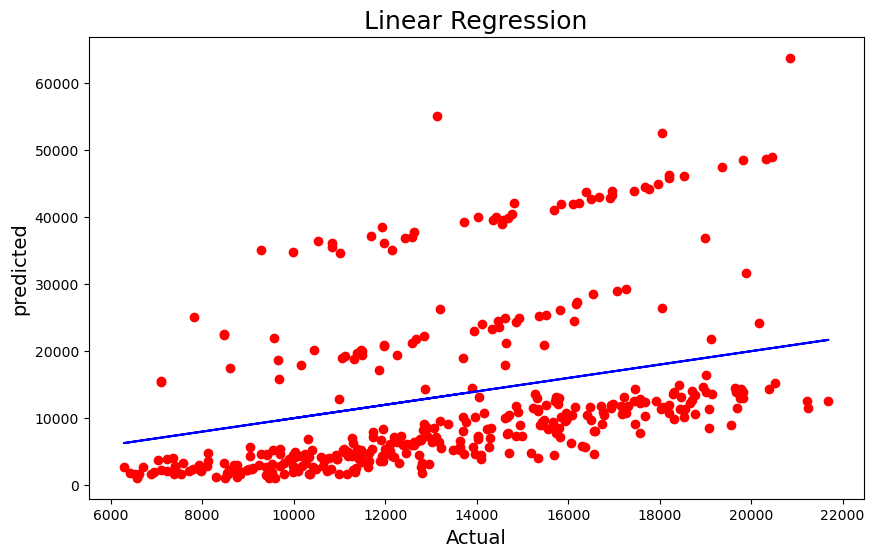

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [84]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_RFR))
print("r2_score on training data:" ,r2_score(y_train,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_RFR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_RFR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_RFR)))

r2_score: -0.07567620337561598
r2_score on training data: 84.18113856183834
Mean absolute error: 9568.911666563523
Mean squared erroe: 168822395.5633315
Root mean squared error: 12993.167264502197


In [86]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
(r2_score(y_test,pred_LR) - score.mean()*100)

[0.11891028 0.12980524 0.11359006 0.13772111 0.08798152]
0.1176016404787961


-11.586555200607991

In [88]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
        'solver':['auto','svd','cholesky','1sqr','sag','saga','1bfgs'],
        'positive':[False,True],
        'random_state':[1,4,10,20]
        }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', '1sqr', 'sag',
                                    'saga', '1bfgs']})

In [89]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [90]:
Model = Ridge(alpha= 2,fit_intercept= True, positive= True,random_state= 1,solver= 'auto')

In [91]:
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print("r2_score:" , r2_score(y_test,pred))
print("Mean absolute error:" ,mean_absolute_error(y_test, pred))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.173486334846073
Mean absolute error: 9044.88938969178
Mean squared erroe: 129717489.77920936
Root mean squared error: 11389.358620186185


In [93]:
import pickle
filename='Insurancecost.pkl'
pickle.dump(Model,open(filename, 'wb'))

In [94]:
loaded_model=pickle.load(open('Insurancecost.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

17.3486334846073


In [95]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
Predicted,9671.888894,14312.825888,12277.978773,19881.582378,11705.34623,7378.011425,13721.660734,11330.695273,18518.500491,11191.011846,...,13190.728657,8995.161238,12146.058884,19815.564207,8744.658985,11503.973822,15686.283916,18756.698364,11934.703394,13692.540705
Original,18648.421700,8516.829000,19442.353500,31620.001060,5415.66120,4005.422500,18963.171920,18804.752400,10226.284200,1633.961800,...,26236.579970,2205.980800,35069.374520,48549.178350,2137.653600,20009.633650,12523.604800,10579.711000,4433.915900,10197.772200


These are the predicted and the actual value as per the analysis